# Handwritten digit recogniser

This tutorial is under constructions so all explanations aren't present. 

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from sklearn import preprocessing
import pickle
from keras.models import model_from_yaml

%matplotlib inline

Using TensorFlow backend.
/Users/ishankhurana/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


The code below is used to visualise the images from the data set. 

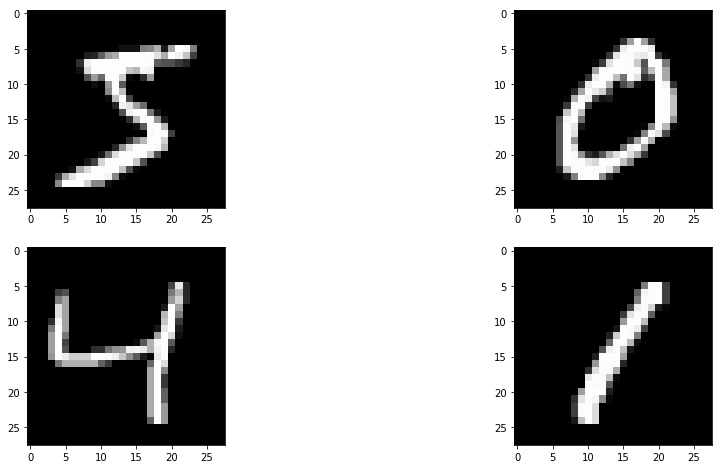

In [2]:
#load (download if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# plot 4 images as gray scale
fig = plt.figure()
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

fig.set_size_inches(16,8)


# show the plot
plt.show()

**Defining some useful functions**

In [2]:
def classifier():
    """
    Creates an model for MNIST image classification with input dimension 784
    returns: Keras model
    """
    
    model = Sequential()
    model.add(Dense(num_pixels,input_dim=num_pixels,kernel_initializer='normal',activation='relu'))
    model.add(Dense(int(num_pixels/2),activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(int(num_pixels/2),activation='relu'))
    model.add(Dense(int(num_pixels/2),activation='relu'))
    
    model.add(Dense(num_classes,activation='softmax'))
    
    return model

def writeResultsToFile(events,filePath):
    """
    Writes events to pickle file. Ideally dump few objects where the objects could be any data structures
    containing other objects
    :param events:
    :param filePath:
    """
    print("Writing...")
    if filePath[-3:]!="pkl":
        filePath = filePath+".pkl"

    with open(filePath, "wb") as output:

        pickle.dump(events, output, pickle.HIGHEST_PROTOCOL)
        
def loadResultsFromFile(filePath,python2 = False):
    """
    Loads objects from pickle file
    :param filePath:
    :return: values in pickle file
    """
    load = []
    print("Loading...")
    with open(filePath, "rb") as file:
        hasNext = True
        if python2:

            load.append(pickle.load(file))
        else:
            load.append(pickle.load(file, encoding='latin1'))
        while hasNext:
            try:
                if python2:
                    load.append(pickle.load(file))
                else:
                    load.append(pickle.load(file, encoding='latin1'))
            except:
                hasNext = False

    if len(load) == 1:
        return load[0]
    else:
        return load
    


# Preprocessing the data

The images from MNIST are in the form of 28 x 28 matrices containing values between 0 and 255. These are converted to a flat 784 element numpy array with values between 0 and 1. 

In [3]:
# flatten 28*28 images to a 784 vector for each image
(x_train, y_train), (x_test, y_test) = mnist.load_data()

num_pixels = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(x_train.shape[0], num_pixels).astype('float32')
x_test = x_test.reshape(x_test.shape[0], num_pixels).astype('float32')

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

num_classes = 10


# Scale Data 
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
scaler.fit(x_train)
x_train = scaler.transform(x_train)

scaler.fit(x_test)
x_test = scaler.transform(x_test)


# Create and compile model

model = classifier()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train,y_train,validation_data=(x_test, y_test), epochs=10, batch_size=200,verbose = 1)

# Save model to file
yaml_string = model.to_yaml()
writeResultsToFile(yaml_string,"model_yaml.pkl")
model.save_weights('neural_net_weights')




Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 18s 300us/step - loss: 0.2444 - acc: 0.9250 - val_loss: 0.1059 - val_acc: 0.9664
Epoch 2/10
60000/60000 [==============================] - 17s 276us/step - loss: 0.0893 - acc: 0.9726 - val_loss: 0.0971 - val_acc: 0.9696
Epoch 3/10
60000/60000 [==============================] - 17s 290us/step - loss: 0.0607 - acc: 0.9812 - val_loss: 0.0785 - val_acc: 0.9773
Epoch 4/10
60000/60000 [==============================] - 17s 284us/step - loss: 0.0474 - acc: 0.9850 - val_loss: 0.0776 - val_acc: 0.9757
Epoch 5/10
60000/60000 [==============================] - 19s 310us/step - loss: 0.0352 - acc: 0.9886 - val_loss: 0.0864 - val_acc: 0.9770
Epoch 6/10
60000/60000 [==============================] - 18s 301us/step - loss: 0.0320 - acc: 0.9896 - val_loss: 0.0759 - val_acc: 0.9786
Epoch 7/10
60000/60000 [==============================] - 17s 290us/step - loss: 0.0280 - acc: 0.9917 - val_loss: 0.

Loading...


NameError: name 'X_train' is not defined

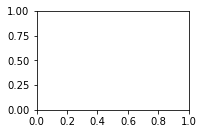

In [4]:
# Test loaded model
model_loaded = loadResultsFromFile('model_yaml.pkl');
model_loaded = model_from_yaml(model_loaded)
model_loaded.load_weights('neural_net_weights')

# Select 
test_index = np.random.randint(len(x_train))

example = x_train[test_index]
example = example.reshape(1,784)
solution  = model_loaded.predict(example)

# Plot image and print classification
fig = plt.figure()
plt.subplot(221)
plt.imshow(X_train[test_index], cmap=plt.get_cmap('gray'))
fig.set_size_inches(12,9)
solution = str(np.argmax(solution))
plt.title("This image is classified as "+solution)


In [15]:
y_train[test_index]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.])

In [ ]:
### Taking images with OpenCV

In [1]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [3]:

cam = cv2.VideoCapture(1)
s, im = cam.read() # captures image
# cv2.imshow("Test Picture", im) # displays captured image
cv2.imwrite("test.bmp",im) # writes image test.bmp to disk



True

In [ ]:
import cv2
cap = cv2.VideoCapture(0)
ret, frame = cap.read()
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
# cv2.imshow('frame',gray)
cv2.imshow('image',gray)
cv2.waitKey(0)
cap.
cv2.destroyAllWindows()